In [5]:
import numpy as np
# Enable interactive plot
#%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl
from matplotlib.animation import FuncAnimation
from IPython.display import HTML
#HTML(ani.to_jshtml())

In [229]:
t = np.linspace(0,2*np.pi, 50)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[], 'ro')

def animate(i):
    l.set_data(t[:i], x[:i])

ani = mpl.animation.FuncAnimation(fig, animate, frames=len(t), interval = 1)


from IPython.display import HTML
HTML(ani.to_jshtml())

<IPython.core.display.Javascript object>

In [9]:
# CLOSE_DX = 5.0
# CLOSE_DY = 5.0
# AVOID_FACTOR = 0.5
# MATCHING_FACTOR = 0.001
# VISIBLE_RANGE = 10.0
# CENTERING_FACTOR = 0.01

# Parameters
TURN_FACTOR = 0.2
VISUAL_RANGE = 10
PROTECTED_RANGE = 8
CENTERING_FACTOR = 0.0005
AVOID_FACTOR = 0.05
MATCHING_FACTOR = 0.005
MAXIMUM_SPEED = 6
MINIMUM_SPEED = 3
MAXIMUM_BIAS = 0.01
BIAS_INCREMENT: 0.00004


class Boid:

    def __init__(self, position, velocity, bias, scoutGroup):
        self.position = position
        self.velocity = velocity
        self.bias = bias
        self.scoutGroup = scoutGroup
    
    def UpdatePosition(self, DeltaTime):
        self.position += (self.velocity * DeltaTime)

    def UpdateVelocity(self, OtherBoid, DeltaTime):
        # Face boid towards the closest one
        # Normalise, and keep speed constant 
        #ClosestBoidPositionNormalised = ClosestBoid.position/np.sqrt(np.sum(v**2))
        #MidPointBetweenPositions = (self.position + ClosestBoid.position)/2
        self.velocity = Normalise(OtherBoid.position - self.position) # Normalise(self.position + ClosestBoid.position)


        # Steer to avoid crowding flockmates
        # If the distance between two boids is too small, steer away
        
#        if (np.sqrt((self.position - OtherBoid.position)**2) < [CLOSE_DX, CLOSE_DY]).all():
#            self.velocity += [CLOSE_DX*AVOID_FACTOR, CLOSE_DY*AVOID_FACTOR]
#        self.velocity = Normalise(self.velocity)

# boid1 = Boid([1.0, 2.0], [2.0, 4.0])
# print(boid1.position)
# print(boid1.velocity)
# #boid1.UpdatePosition(DeltaTime)

# boid1.velocity.type# * DeltaTime

def Normalise(u):
    return u/np.sqrt(np.sum(u**2))

In [223]:
DeltaTime = 0.5 # Seconds
boid1 = Boid(np.random.rand(2), np.random.rand(2))

for time in np.arange(0,100,DeltaTime):
    boid1.UpdatePosition(DeltaTime)

In [416]:
np.random.random_integers(10)

/var/folders/03/765pb_2s43v72wd74nscd38w0000gn/T/ipykernel_11557/26169188.py:1: DeprecationWarning: This function is deprecated. Please call randint(1, 10 + 1) instead
  np.random.random_integers(10)


10

/var/folders/03/765pb_2s43v72wd74nscd38w0000gn/T/ipykernel_70360/1035459715.py:17: DeprecationWarning: This function is deprecated. Please call randint(1, 3 + 1) instead
  ScoutGroup = np.random.random_integers(NUMBER_GROUPS)


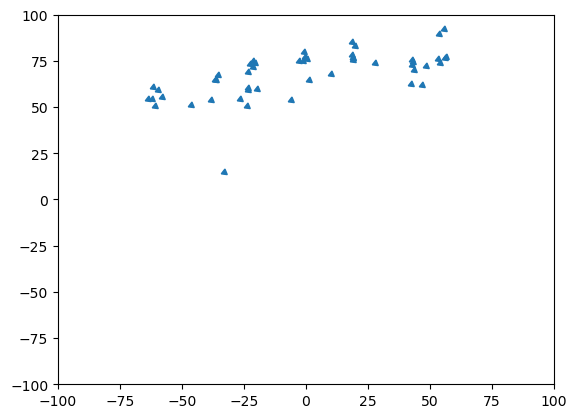

In [66]:
DeltaTime = 20.0 # Seconds
MaximumTime = 3600.0 * 2.0
Time = np.arange(0, MaximumTime, DeltaTime) # np.linspace(0,2*np.pi, 100)

VELOCITY = 4
RESOLUTION = [100, 100]
POSITION_RANGE = 100
MARGIN = 20
NUMBER_GROUPS = 3

NumberBoids = 50

boids = []
for i in range(NumberBoids):
    InitialPosition = np.random.rand(2)*POSITION_RANGE - POSITION_RANGE/2
    InitialVelocity = np.random.rand(2)*VELOCITY - VELOCITY/2
    ScoutGroup = np.random.random_integers(NUMBER_GROUPS)
    Bias = np.random.rand()*MAXIMUM_BIAS
    boids.append( Boid(InitialPosition, InitialVelocity, Bias, ScoutGroup))
#boids.append(boid2)
#boids.append(boid3)



fig, ax = plt.subplots()
ax.axis([-RESOLUTION[0], RESOLUTION[0], -RESOLUTION[1], RESOLUTION[1]])
#l, = ax.plot([],[], 'o'
i = 0
l, = ax.plot([],[], marker=(3, 0, i*90), markersize=5, linestyle='None')
#plt.plot(i, i, marker=(3, 0, i*90), markersize=20, linestyle='None')

def animate(i):

    for i, Boid in enumerate(boids):

        # Separation
        ClosePosition = np.zeros(2)
        for j, OtherBoid in enumerate(boids):
            if i != j:
                #return
                if (np.sqrt((Boid.position - OtherBoid.position)**2) < ClosePosition).all():
                    ClosePosition += Boid.position - OtherBoid.position
        Boid.velocity += ClosePosition*AVOID_FACTOR
        #boid.UpdateVelocity(OtherBoid, DeltaTime)

        # Alignment
        AverageVelocity = np.zeros(2)
        NeighbouringBoids = 0

        for j, OtherBoid in enumerate(boids):
            if i != j:
                AverageVelocity += OtherBoid.velocity
                NeighbouringBoids += 1
        
        if NeighbouringBoids > 0:
            AverageVelocity/NeighbouringBoids
        
        Boid.velocity += (AverageVelocity - Boid.velocity) * MATCHING_FACTOR

        # Cohesion
        AveragePosition = np.zeros(2)
        NeighbouringBoids = 0
        for j, OtherBoid in enumerate(boids):
            if i != j:
                if (np.sqrt((Boid.position - OtherBoid.position)**2).sum() < VISUAL_RANGE).all():
                    AveragePosition += OtherBoid.position
                    NeighbouringBoids += 1
        
        if NeighbouringBoids > 0:
            AveragePosition = AveragePosition/NeighbouringBoids
        
        Boid.velocity += (AveragePosition - Boid.position) * CENTERING_FACTOR
                    
        # Screen edges

        # Left margin
        if Boid.position[0] < (-RESOLUTION[0] + MARGIN):
            Boid.velocity[0] = Boid.velocity[0] + TURN_FACTOR
        # Right margin
        if Boid.position[0] > (RESOLUTION[0] - MARGIN):
            Boid.velocity[0] = Boid.velocity[0] - TURN_FACTOR
        # Bottom margin
        if Boid.position[1] > (-RESOLUTION[1] + MARGIN):
            Boid.velocity[1] = Boid.velocity[1] - TURN_FACTOR
        # Top margin
        if Boid.position[1] < (RESOLUTION[1] - MARGIN): 
            Boid.velocity[1] = Boid.velocity[1] + TURN_FACTOR

        # Bias the boids into groups
        #for ScoutGroup in range(NUMBER_GROUPS):
        if (Boid.scoutGroup == 1):
            # Biased to the right of the screen
            Boid.velocity[0] = (1 - Boid.bias)*Boid.velocity[0] + (Boid.bias * 1.0)
        elif (Boid.scoutGroup == 2):
            # Biased to the left of the screen
            Boid.velocity[0] = (1 - Boid.bias)*Boid.velocity[0] + (Boid.bias * (-1.0))

        # Speed limits
        Speed = np.sqrt((Boid.velocity**2).sum())
        if Speed > MAXIMUM_SPEED:
            Boid.velocity = (Boid.velocity/Speed)/MAXIMUM_SPEED
        if Speed < MINIMUM_SPEED:
             Boid.velocity = (Boid.velocity/Speed)/MINIMUM_SPEED


        # Update position
        Boid.UpdatePosition(DeltaTime)

    # Prepare to plot
    BoidPositionsTemp = []
    sumVelocities = np.zeros(2)

    for boid in boids:
        BoidPositionsTemp.append(boid.position)
        sumVelocities += boid.velocity
    MeanVelocity = sumVelocities/len(boids)
    MeanDirection = np.arctan(MeanVelocity[1]/MeanVelocity[0]) * 180/np.pi

    l.set_data(np.transpose(BoidPositionsTemp))
    l.set_marker((3, 0, MeanDirection - 90))
   

    #print(BoidPositionsTemp[0])
   # print(boid1.position)
   # print(boid2.position)
    #print(np.sqrt(boid1.velocity**2).sum())
    #print(np.sqrt(boid2.velocity**2).sum())
    #print(boid1.velocity)


ani = mpl.animation.FuncAnimation(fig, animate, frames=len(Time), interval = 30)

from IPython.display import HTML
HTML(ani.to_jshtml())

In [55]:
temp_vel = []
sumVelocities = np.zeros(2)
for boid in boids:
       temp_vel.append(boid.velocity)
       sumVelocities += boid.velocity
sumVelocities/len(boids)
MeanVelocity = sumVelocities/len(boids)
MeanDirection = np.arctan(MeanVelocity[1]/MeanVelocity[0]) * 180/np.pi
MeanDirection

-43.17688400382799

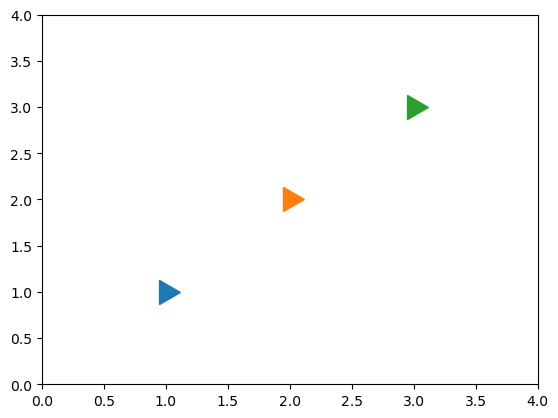

In [64]:
import matplotlib.pyplot as plt
x = [1,2,3]
for i in x:
    plt.plot(i, i, marker=(3, 0, -90), markersize=20, linestyle='None')


plt.xlim([0,4])
plt.ylim([0,4])

plt.show()


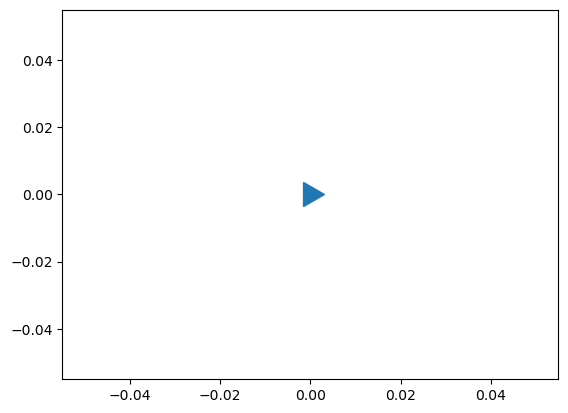

In [15]:
plt.plot(i, i, marker=(3, 0, -90), markersize=20, linestyle='None')

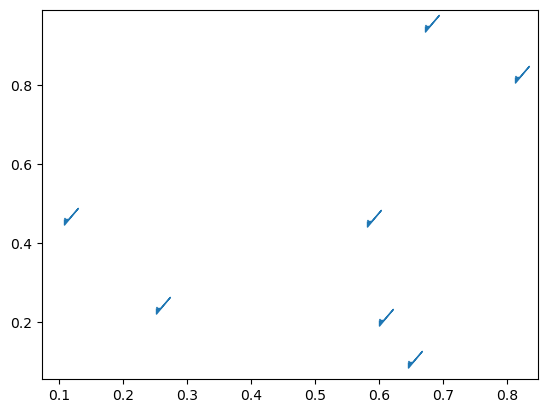

In [30]:
x = np.random.rand(7)
y = np.random.rand(7)
plt.plot(x,y,
       marker=[(0,1),(1,0),(2,0),(3,0),(10,8),(0,-4),(0,0)],
        markersize=20, linestyle='None')

In [33]:
l.get_data()

(array([-14.75987562,  71.24900149, -19.64380469]),
 array([53.53411741, 75.58412086, 47.98325399]))